**Орлов Никита Сергеевич**

**Telegram:** https://t.me/nikus96

**Задача:**
Разделить пользователей на кластеры. Предлагаемые кластеры: активный донор, спящий донор, реактивированный донор, потерянный.




**Ссылка на презентацию:** <https://disk.yandex.ru/i/Q19j_07CZD2i2w>

Итоговый вывод
-

**Основные советы:**
- Попробовать привлечь больше студентов - группа 18-25, продумать акции, которые были бы интересны именно этой категории.
- Попробовать привлечь больше женщин из возрастной группы 26-50, особенно важно сформировать повторные донаты.
- При привлечении новых донатеров стоит обратить внимание на Москву и Санкт-Петербург.


**Кластеризация:**
- Было сформировано 5 кластеров а именно:

Активный донор — есть донат в последние 12 месяцев и общая сумма донатов за последние 24 месяца больше или равно одному, или в последние 12 месяцев сделано два доната или больше.

Первичный донор — есть один донат в последние 12 месяцев, но раньше донатов не было. Это донор, который впервые сделал донат и лишь один, поэтому мы не добавляем его в активную группу.

Потерянный донор — последние 24 месяца нет донатов.

Спящий донор - смотрим на промежуток 12 месяцев назад по 24 месяца назад, был ли донат, и в течение последних 12 месяцев не было донатов.

Реактивированный — в последние 12 месяцев есть донаты, но до этого 24 месяца не было донатов, и в каком то месяце 24 месяца назад и раньше был донат.


Из общего числа доноров, а это 24 840 человек, большинство составляют потерянные доноры, их 10 785 - 43%, активных доноров 7 386 - 30%. Спящих доноров - 5 155 - 21%.  Первичный донор - 1 268 - 5%. Реактивированных доноров всего 246 - 1%.


**Исследовательский анализ:**
- Всего было подтверждено 203 145 донаций. Чаще всего сдавали цельную кровь — 129 894 раза, или 64% от общего числа донаций. Плазму сдают реже — 48 603 раза, или 24%, а тромбоциты — 24 245 раз, или 12%.

Среди донаций 64% принадлежит мужчинам (130 092), а у женщин — 36% (72 782). Количество донаций у мужчин превышает количество у женщин в 1,8 раза. Среди донаторов меньше женщин — 9 564 (46%), мужчин — 11 074 (54%). Следует рассмотреть возможность привлечения новых донаторов — женщин, а также стимулирования повторных пожертвований.

Категория «26–50» лидирует, 178 224 донации — 88% от общего числа донаций, затем идет категория «18–25» — 16 598, или 8%, и замыкает тройку категория «51–60» — 8 323, или 4%. Возможно, стоит обратить внимание на привлечение молодых людей в возрасте от 18 до 25 лет к сдаче крови, то есть студентов.

На основании двух таблиц и одного графика мы  сделали вывод, что топ-10 городов и топ-10 городов в отношении одного доната на человека различаются. Например, в тройку лидеров по количеству доноров в топ-10 городов вошли:

Москва — 40 303 донатов;
Санкт-Петербург — 12 985 донатов;
Казань — 12 660 донатов;
В то же время в топ-10 городов в отношении одного доната на человека вошли:

Нижневартовск;
Сургут;
Казань;
Москва же занимает 19 место, а Санкт-Петербург — 37 место.

Это говорит о том, что Москве и Санкт-Петербургу есть куда развиваться в плане привлечения потенциальных доноров. Стоит обратить на это внимание. В России же было сделано  больше всего донатов.

**Предобработка данных:**
- Было принято решение создать основную таблицу df из таблиц donations_anon и users_anon. В ней привели  столбцы в нормальный вид, убрали дубликаты и добавили  значения NaN в столбце dt_plan, где клиенты их не заполнили. Это же сделали со столбцами sex и birth. В столбцах dt_plan, dt_donat, dt_confirm, birth изменили тип данных на datetime и создали 4 новых столбца: год доната — year_donat, месяц доната — month_donat, возраст донора — age и столбец с возрастными категориями — category. В основную таблицу вошли люди от 18 до 60 лет, когда можно сдавать кровь.



# Проект: DonorSearch

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas._libs.tslibs.np_datetime import OutOfBoundsDatetime
from datetime import datetime


In [2]:
try:
    users_anon = pd.read_csv('data/users_anon_data.csv') #Данные пользователей в системе
    donations_anon = pd.read_csv('data/donations_anon.csv') #Донации пользователей
    donations_plan = pd.read_csv('data/anon_donations_plan.csv') #Данные о запланированных донациях
    bonuses =  pd.read_csv('data/bonuses_anon.csv')
    user_bonus = pd.read_csv('data/user_bonus_anon.csv')
except:
    users_anon = pd.read_csv('users_anon_data.csv') #Данные пользователей в системе
    donations_anon = pd.read_csv('donations_anon.csv') #Донации пользователей
    donations_plan = pd.read_csv('anon_donations_plan.csv') #Данные о запланированных донациях
    bonuses =  pd.read_csv('bonuses_anon.csv')
    user_bonus = pd.read_csv('user_bonus_anon.csv')



Для начала посмотрим на таблицы и решим, с какими столбцами мы будем работать. 

In [3]:
display(users_anon.head())
users_anon.columns

,ID,Пол,Дата рождения,Регион,Группа крови,Kell-фактор,Готов сдавать Цельную кровь,Готов сдавать Плазму,Готов сдавать Тромбоциты,Готов сдавать Эритроциты,...,Получен значок 20,Получен значок 75,Получен значок 100,Получен значок 150,Получен значок друг DS,Отправлена футболка,Отправлен браслет,Донаций с 1 января,Донаций на момент регистрации,Количество взятых бонусов
0,300328,Не указано,Не указано,"Россия, Тверская область, Тверь",Не указано,Не указано,Да,Да,Да,Да,...,нет,нет,нет,нет,нет,нет,нет,0,Не указано,0
1,300327,Мужской,08.12.1971,Не указано,Не указано,Не указано,Да,Да,Да,Да,...,нет,нет,нет,нет,нет,нет,нет,0,Не указано,0
2,300326,Не указано,Не указано,"Россия, Москва",Не указано,Не указано,Да,Да,Да,Да,...,нет,нет,нет,нет,нет,нет,нет,0,Не указано,0
3,300325,Не указано,Не указано,Не указано,Не указано,Не указано,Да,Да,Да,Да,...,нет,нет,нет,нет,нет,нет,нет,0,Не указано,0
4,300324,Мужской,12.10.1971,Не указано,Не указано,Не указано,Да,Да,Да,Да,...,нет,нет,нет,нет,нет,нет,нет,0,Не указано,0


Index(['ID', 'Пол', 'Дата рождения', 'Регион', 'Группа крови', 'Kell-фактор',
       'Готов сдавать Цельную кровь', 'Готов сдавать Плазму',
       'Готов сдавать Тромбоциты', 'Готов сдавать Эритроциты',
       'Готов сдавать Лейкоциты', 'Готов сдавать Костный мозг',
       'Почетный донор', 'Отвод от донации', 'Цельная кровь', 'Плазма',
       'Тромбоциты', 'Эритроциты', 'Лейкоциты', 'Дата регистрации',
       'Не подтверждённые донации', 'Прошедших донаций',
       'Донаций до регистрации', 'Последняя активность', 'Теги',
       'Указан email', 'Указан телефон', 'Авторизация через ВК',
       'Авторизация через Одноклассники', 'Авторизация через Твиттер',
       'Авторизация через Яндекс', 'Авторизация через Гугл',
       'Подтверждённые донации', 'Получен значок 20', 'Получен значок 75',
       'Получен значок 100', 'Получен значок 150', 'Получен значок друг DS',
       'Отправлена футболка', 'Отправлен браслет', 'Донаций с 1 января',
       'Донаций на момент регистрации', 'Количест

In [4]:
 donations_anon.head()

,ID,ID пользователя,Класс крови,Дата донации,Дата планирования,Тип донации,Город,Регион,Страна,Место сдачи,Есть справка,Дата добавления донации,Статус донации
0,367797,210974,Цельная кровь,22.11.2023,Не указана,Безвозмездно,Оренбург,Оренбургская область,Россия,"ГБУЗ ""Оренбургская областная станция переливан...",Да,25.08.2024,На модерации
1,367796,146460,Плазма,16.08.2024,16.08.2024,Безвозмездно,Рыбинск,Ярославская область,Россия,"ГБУЗ ЯО ""Рыбинская станция переливания крови""",Да,25.08.2024,На модерации
2,367795,292587,Цельная кровь,24.08.2024,24.08.2024,Безвозмездно,Москва,Не указан,Россия,Центр крови им. Гаврилова (центр в Царицыно),Да,25.08.2024,На модерации
3,367794,300322,Цельная кровь,23.08.2024,Не указана,Безвозмездно,Уфа,Башкортостан,Россия,"ГБУЗ ""Республиканская станция переливания крови""",Да,25.08.2024,На модерации
4,367793,300322,Цельная кровь,07.05.2024,Не указана,Безвозмездно,Уфа,Башкортостан,Россия,"ГБУЗ ""Республиканская станция переливания крови""",Да,25.08.2024,На модерации


In [5]:
donations_plan.head()

,ID,ID пользователя,Класс крови,Планируемая дата,Дата создания планирования,Тип донации,Регион,Место стадчи,Статус,Есть справка
0,38294,223833,Плазма,16.09.2024,25.08.2024,Безвозмездно,"Россия, Москва","НМИЦ ССХ им. А.Н. Бакулева, ОПК",донация запланирована,Нет
1,38293,300325,Цельная кровь,29.08.2024,25.08.2024,Безвозмездно,"Россия, Санкт-Петербург",Городская станция переливания крови Санкт-Пете...,донация запланирована,Нет
2,38292,300325,Цельная кровь,29.08.2024,25.08.2024,Безвозмездно,"Россия, Воронежская область, Воронеж","ГУЗ ""Воронежская ОКБ №1"", ОПК",планирование отменено,Нет
3,38291,6790,Цельная кровь,23.10.2024,25.08.2024,Безвозмездно,"Россия, Кемеровская область, Кемерово","МУЗ ""ГКБ №3 им. М.А. Подгорбунского"", отделени...",донация запланирована,Нет
4,38290,6790,Цельная кровь,23.10.2024,25.08.2024,Безвозмездно,"Россия, Кемеровская область, Кемерово","МУЗ ""ГКБ №3 им. М.А. Подгорбунского"", отделени...",донация запланирована,Нет


In [6]:
 bonuses.head()

,ID,Изображение бонуса,Изображение партнера,Опубликован?,На главной странице?,Приоритет,Взято промокодов,Всего промокодов,Срок действия,Дата добавления,Города
0,208,Есть,Есть,Нет,Нет,0,1,25,24.08.2024,14.08.2024,Доступен всем
1,207,Есть,Есть,Да,Нет,1000,57,102,31.08.2024,14.08.2024,Доступен всем
2,205,Есть,Есть,Да,Нет,0,2,100,31.08.2024,02.08.2024,Москва
3,204,Есть,Есть,Да,Нет,100,54,1000,31.10.2024,24.07.2024,Доступен всем
4,203,Есть,Есть,Да,Нет,100,57,1000,31.10.2024,24.07.2024,Доступен всем


In [7]:
 user_bonus.head()

,ID пользователя,Количество взятых бонусов,Количество донаций,Название партнера,Бонус,Дата использования,Страна,Регион,Город
0,149473,121,61,Череповецкий марафон,Скидка 10% на участие в Череповецком марафоне,15.08.2024,Россия,NaN,Санкт-Петербург
1,275997,7,2,DonorSearch,10% на мерч от DonorSearch в ЯндексМаркете,25.08.2024,Россия,Ивановская область,Иваново
2,182830,11,22,DonorSearch,10% на мерч от DonorSearch в ЯндексМаркете,25.08.2024,Россия,NaN,Санкт-Петербург
3,174938,2,32,DonorSearch,10% на мерч от DonorSearch в ЯндексМаркете,25.08.2024,Россия,Томская область,Томск
4,279206,4,13,DonorSearch,10% на мерч от DonorSearch в ЯндексМаркете,24.08.2024,Россия,NaN,Москва


Кажется, что целевая для нас информация находится в таблицах donations_anon и users_anon. Объединим их и выберем нужные столбцы.

In [8]:
donations_anon = donations_anon.drop(['ID', 'Регион'], axis=1)

In [9]:
donations_anon = donations_anon.rename(columns={'ID пользователя': 'ID'})

In [10]:
qw = users_anon[['ID', 'Пол', 'Дата рождения']]
df = pd.merge(donations_anon, qw, on='ID')


## Предобработка данных

Получили итоговую таблицу. Теперь можно заняться предобработкой данных.

In [11]:
df.head()

,ID,Класс крови,Дата донации,Дата планирования,Тип донации,Город,Страна,Место сдачи,Есть справка,Дата добавления донации,Статус донации,Пол,Дата рождения
0,210974,Цельная кровь,22.11.2023,Не указана,Безвозмездно,Оренбург,Россия,"ГБУЗ ""Оренбургская областная станция переливан...",Да,25.08.2024,На модерации,Мужской,31.07.1987
1,146460,Плазма,16.08.2024,16.08.2024,Безвозмездно,Рыбинск,Россия,"ГБУЗ ЯО ""Рыбинская станция переливания крови""",Да,25.08.2024,На модерации,Женский,12.12.1990
2,292587,Цельная кровь,24.08.2024,24.08.2024,Безвозмездно,Москва,Россия,Центр крови им. Гаврилова (центр в Царицыно),Да,25.08.2024,На модерации,Женский,22.05.1988
3,300322,Цельная кровь,23.08.2024,Не указана,Безвозмездно,Уфа,Россия,"ГБУЗ ""Республиканская станция переливания крови""",Да,25.08.2024,На модерации,Женский,Не указано
4,300322,Цельная кровь,07.05.2024,Не указана,Безвозмездно,Уфа,Россия,"ГБУЗ ""Республиканская станция переливания крови""",Да,25.08.2024,На модерации,Женский,Не указано


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356834 entries, 0 to 356833
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       356834 non-null  int64 
 1   Класс крови              356834 non-null  object
 2   Дата донации             356834 non-null  object
 3   Дата планирования        356834 non-null  object
 4   Тип донации              356834 non-null  object
 5   Город                    356834 non-null  object
 6   Страна                   356834 non-null  object
 7   Место сдачи              356834 non-null  object
 8   Есть справка             356834 non-null  object
 9   Дата добавления донации  356834 non-null  object
 10  Статус донации           356834 non-null  object
 11  Пол                      356834 non-null  object
 12  Дата рождения            356834 non-null  object
dtypes: int64(1), object(12)
memory usage: 35.4+ MB


Изменим название столбцов.

In [13]:
df.columns = ['id', 'blood', 'dt_donat', 'dt_plan', 'type_donat', 'city', 'country', 'place', 'report', 'dt_confirm', 'status', 'sex', 'birth']

In [14]:
df.columns

Index(['id', 'blood', 'dt_donat', 'dt_plan', 'type_donat', 'city', 'country',
       'place', 'report', 'dt_confirm', 'status', 'sex', 'birth'],
      dtype='object')

Проверяем на дубликаты, и если они есть, удалим их.

In [15]:
df.duplicated().sum()

40161

In [16]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

Проверим некоторые столбцы на неявные дубликаты.

In [18]:
df['country'].unique()

array(['Россия', 'Казахстан', 'Беларусь', '_', 'Молдова', 'Украина',
       'Кыргызстан', 'Не указан', 'Таджикистан', 'Узбекистан', 'Грузия',
       'Армения', 'Германия', 'Эстония'], dtype=object)

In [19]:
df['blood'].unique()

array(['Цельная кровь', 'Плазма', 'Тромбоциты', 'Эритроциты',
       'Гранулоциты (Лейкоциты)'], dtype=object)

In [20]:
df['type_donat'].unique()

array(['Безвозмездно', 'Платно'], dtype=object)

In [21]:
df['sex'].unique()

array(['Мужской', 'Женский', 'Не указано'], dtype=object)

Проставим nan там, где значение неизвестно.

In [22]:
df = df.apply(lambda x: x.replace(['Не указано', '_', 'Не указан', 'Не указана'], np.nan))

Изменим тип данных для удобства работы с ними.

In [23]:
df['dt_donat'] = pd.to_datetime(df['dt_donat'], format='%d.%m.%Y')


In [24]:
df['dt_plan'] = pd.to_datetime(df['dt_plan'], format='%d.%m.%Y')

In [25]:
df['dt_confirm'] = pd.to_datetime(df['dt_confirm'], format='%d.%m.%Y')

Функция для обработки дат, которые не соответствуют формату '%d.%m.%Y'

In [26]:
def process_dates(date_str):
    try:
        return pd.to_datetime(date_str, format='%d.%m.%Y')
    except (ValueError, OutOfBoundsDatetime):
        return pd.NaT



In [27]:
df['birth'] = df['birth'].apply(process_dates)

Проверяем типы данных.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316673 entries, 0 to 356829
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          316673 non-null  int64         
 1   blood       316673 non-null  object        
 2   dt_donat    316673 non-null  datetime64[ns]
 3   dt_plan     17514 non-null   datetime64[ns]
 4   type_donat  316673 non-null  object        
 5   city        309172 non-null  object        
 6   country     307957 non-null  object        
 7   place       316673 non-null  object        
 8   report      316673 non-null  object        
 9   dt_confirm  316673 non-null  datetime64[ns]
 10  status      316673 non-null  object        
 11  sex         268554 non-null  object        
 12  birth       224551 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(1), object(8)
memory usage: 33.8+ MB


Посмотрим на количество пропусков.

In [29]:
round(df.isnull().mean() * 100)

id             0.0
blood          0.0
dt_donat       0.0
dt_plan       94.0
type_donat     0.0
city           2.0
country        3.0
place          0.0
report         0.0
dt_confirm     0.0
status         0.0
sex           15.0
birth         29.0
dtype: float64

Добавим в таблицу два столбца: с годом и с месяцем и годом. 

In [30]:
df['year_donat'] = df['dt_donat'].dt.year

In [31]:
df['month_donat'] = df['dt_donat'].dt.to_period('M')


Также добавим столбец с возрастом.

In [32]:
df['age'] = datetime.now().year - df['birth'].dt.year

Удалим столбец с годом рождения. 

In [33]:
df = df.drop(['birth'], axis=1)

In [34]:
df.head()

,id,blood,dt_donat,dt_plan,type_donat,city,country,place,report,dt_confirm,status,sex,year_donat,month_donat,age
0,210974,Цельная кровь,2023-11-22,NaT,Безвозмездно,Оренбург,Россия,"ГБУЗ ""Оренбургская областная станция переливан...",Да,2024-08-25,На модерации,Мужской,2023,2023-11,37.0
1,146460,Плазма,2024-08-16,2024-08-16,Безвозмездно,Рыбинск,Россия,"ГБУЗ ЯО ""Рыбинская станция переливания крови""",Да,2024-08-25,На модерации,Женский,2024,2024-08,34.0
2,292587,Цельная кровь,2024-08-24,2024-08-24,Безвозмездно,Москва,Россия,Центр крови им. Гаврилова (центр в Царицыно),Да,2024-08-25,На модерации,Женский,2024,2024-08,36.0
3,300322,Цельная кровь,2024-08-23,NaT,Безвозмездно,Уфа,Россия,"ГБУЗ ""Республиканская станция переливания крови""",Да,2024-08-25,На модерации,Женский,2024,2024-08,NaN
4,300322,Цельная кровь,2024-05-07,NaT,Безвозмездно,Уфа,Россия,"ГБУЗ ""Республиканская станция переливания крови""",Да,2024-08-25,На модерации,Женский,2024,2024-05,NaN


Давайте посмотрим на то, какие у нас есть года донатов.

In [35]:
df['year_donat'].unique()

array([2023, 2024, 2013, 2019, 2022, 2021, 2020, 2018, 2017, 2016, 2015,
       2014, 2012, 2006, 2010, 2011, 2008, 2009, 2003, 2007, 2005, 2004,
       2002, 1995, 1998, 2001, 2000, 1999, 1997, 2087, 2085, 1993, 1992,
       1991, 1990, 2094, 2035, 2083, 2084, 2086, 1986, 2073, 2027, 2089,
       2038, 1987, 2098, 2092, 2081, 2095, 2042, 2071, 2076, 1984, 1994,
       1985, 1996, 1983, 1989, 1988, 1982, 1981, 1980, 1975], dtype=int32)

In [36]:
display(df.query('year_donat ==  2098'))
display(df.query('year_donat ==  2089'))
display(df.query('year_donat == 2095'))
df.query('year_donat == 1980')

,id,blood,dt_donat,dt_plan,type_donat,city,country,place,report,dt_confirm,status,sex,year_donat,month_donat,age
29300,278233,Тромбоциты,2098-07-02,NaT,Безвозмездно,Оренбург,Россия,"ГБУЗ ""Оренбургская областная станция переливан...",Да,2024-07-05,Удалена,Женский,2098,2098-07,26.0


,id,blood,dt_donat,dt_plan,type_donat,city,country,place,report,dt_confirm,status,sex,year_donat,month_donat,age
25731,296773,Тромбоциты,2089-03-15,NaT,Безвозмездно,Лесосибирск,Россия,Лесосибирский филиал Красноярского краевого це...,Да,2024-07-16,Удалена,Женский,2089,2089-03,35.0


,id,blood,dt_donat,dt_plan,type_donat,city,country,place,report,dt_confirm,status,sex,year_donat,month_donat,age
42214,57425,Цельная кровь,2095-11-23,NaT,Безвозмездно,Казань,Россия,Казанский плазмоцентр ФГБУ РМНПЦ «Росплазма» Ф...,Да,2024-06-01,Удалена,Женский,2095,2095-11,29.0
44597,280385,Тромбоциты,2095-10-08,NaT,Безвозмездно,Петропавловск-Камчатский,Россия,"ГБУЗ ""Камчатская краевая станция переливания к...",Да,2024-05-24,Удалена,Мужской,2095,2095-10,29.0


,id,blood,dt_donat,dt_plan,type_donat,city,country,place,report,dt_confirm,status,sex,year_donat,month_donat,age
157688,255283,Цельная кровь,1980-10-20,NaT,Безвозмездно,Сургут,Россия,"КУ ХМАО-Югры ""Станция переливания крови"", голо...",Да,2023-04-24,Принята,Мужской,1980,1980-10,NaN
157689,255283,Плазма,1980-09-08,NaT,Безвозмездно,Сургут,Россия,"КУ ХМАО-Югры ""Станция переливания крови"", голо...",Да,2023-04-24,Принята,Мужской,1980,1980-09,NaN
157690,255283,Плазма,1980-08-18,NaT,Безвозмездно,Сургут,Россия,"КУ ХМАО-Югры ""Станция переливания крови"", голо...",Да,2023-04-24,Принята,Мужской,1980,1980-08,NaN
161573,253080,Цельная кровь,1980-03-19,NaT,Безвозмездно,Кемерово,Россия,"ГКУЗ ""Кузбасский центр крови"" (Кемеровский об...",Да,2023-04-09,Принята,Женский,1980,1980-03,61.0


Кажется, произошел сбой, и, видимо, он произошел в 2024 году, поэтому решено подставить вместо неправильного года год подтверждения справки — это 2024.

In [37]:
def year(x):
    if x > 2024:
        return 2024
    else:
        return x

In [38]:
df['year_donat'] = df['year_donat'].apply(year)

In [39]:
df['year_donat'].unique()

array([2023, 2024, 2013, 2019, 2022, 2021, 2020, 2018, 2017, 2016, 2015,
       2014, 2012, 2006, 2010, 2011, 2008, 2009, 2003, 2007, 2005, 2004,
       2002, 1995, 1998, 2001, 2000, 1999, 1997, 1993, 1992, 1991, 1990,
       1986, 1987, 1984, 1994, 1985, 1996, 1983, 1989, 1988, 1982, 1981,
       1980, 1975])

Давайте посмотрим на распределение по годам.

<Axes: >

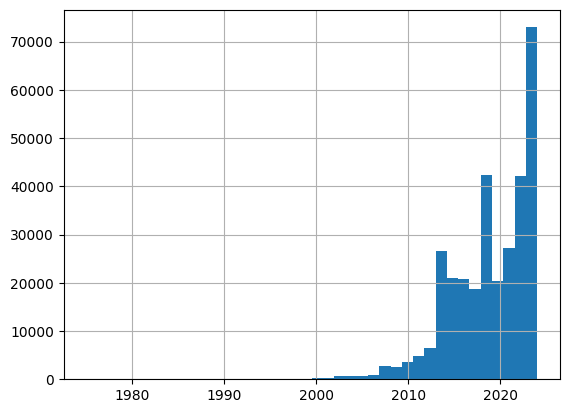

In [40]:
df['year_donat'].hist(bins=40)

Основные значения находятся в диапазоне с 2013 по 2024 год.

Посмотрим на возрастной диапазон.

In [41]:
df['age'].sort_values().unique()

array([  4.,   5.,   6.,  11.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
        20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
        31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
        53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  73.,  74.,  84.,
        91.,  96., 104., 105., 107., 112., 114., 116., 119., 120., 122.,
       123., 124., 127.,  nan])

<Axes: >

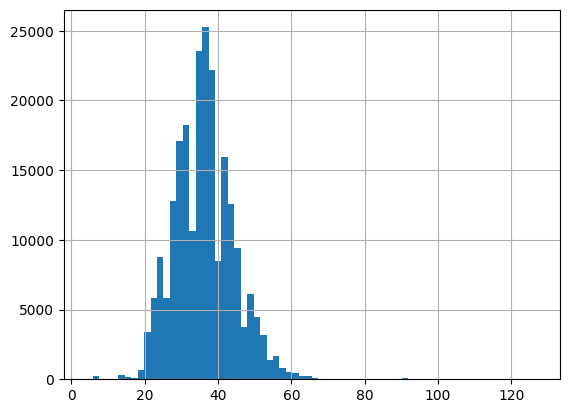

In [42]:
df['age'].hist(bins=70)

Уберем аномальные значения возраста: оставим в диапазоне 18–60 лет, это тот возраст, в котором можно сдавать.

In [43]:
df = df.query('age >= 18 and age <= 60')


In [44]:
df.shape

(222459, 15)

**Промежуточный вывод:** 

Было предоставлено несколько таблиц, после чего было решено создать основную таблицу df, в которую вошли данные из таблиц donations_anon и users_anon.
В основной таблице столбцы были приведены к нормальному виду. Также в данных были обнаружены дубликаты, после чего они были удалены. Также в столбцах были проставлены значения nan там, где были указаны такие значения («Не указано», «_», «Не указан», «Не указана»). В столбце dt_plan 94% пропусков — причина в клиентах, который просто их не заполнили, то же самое со столбцом sex, правда, там 15% пропусков, и в столбце birth, там 29% пропусков. Также в столбцах dt_donat, dt_plan, dt_confirm и birth был изменен тип данных на datetime. Помимо этого, было создано 4 новых столбца. Это год доната — year_donat, месяц доната — month_donat, возраст донатера — age и столбец с возрастными категориями — category. Также в основую таблицу вошли люди чей возраст от 18 до 60 лет - возраст, в котором можно сдавать кровь. 

## Исследовательский анализ

Подготовим предварительные вопросы, наметим направление исследования.

1. Какой тип крови чаще сдают?
2. В каких городах больше всего сдают кровь? Топ 5 городов доноров.
3. В какой стране больше всего сдают кровь?
4. Топ 10 пунктов сдачи крови.
5. Какой пол сдает кровь чаще?
6. Какая возрастная категория сдает кровь?
7. Какая возрастная категория сдает чаще?

**Какой тип крови чаще сдают?**

Посмотрим сколько всего справок было принято.

In [45]:
df.query('status == "Принята"').shape

(203145, 15)

Выведем таблицу с типом крови и количеством донатов, а также количество людей, сдавших тот или иной тип крови.

In [46]:
top_blood = df.query('status == "Принята"').groupby('blood')['id'].count().reset_index().sort_values(by='id', ascending=False)
top_blood_2 = df.query('status == "Принята"').groupby('blood')['id'].nunique().reset_index().sort_values(by='id', ascending=False)
top_blood['procent'] = round(top_blood['id'] /  top_blood['id'].sum() * 100, 2)
top_blood_2['procent'] = round(top_blood_2['id'] /  top_blood_2['id'].sum() * 100, 2)
display(top_blood)
top_blood_2

,blood,id,procent
3,Цельная кровь,129894,63.94
1,Плазма,48603,23.93
2,Тромбоциты,24245,11.93
4,Эритроциты,342,0.17
0,Гранулоциты (Лейкоциты),61,0.03


,blood,id,procent
3,Цельная кровь,19289,69.27
1,Плазма,5218,18.74
2,Тромбоциты,3082,11.07
4,Эритроциты,221,0.79
0,Гранулоциты (Лейкоциты),38,0.14


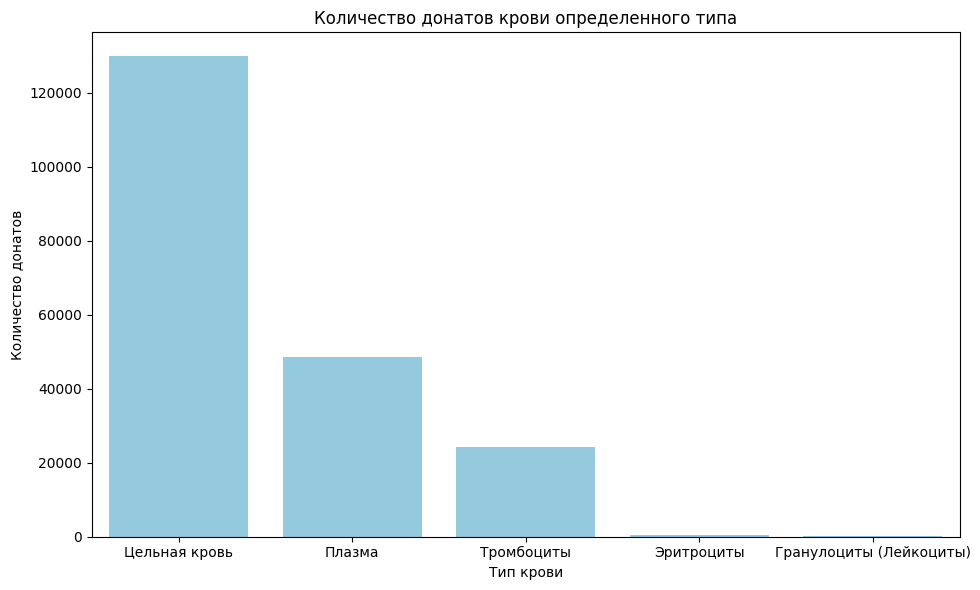

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_blood, x='blood', y='id',  color="skyblue")

plt.title('Количество донатов крови определенного типа')
plt.xlabel('Тип крови')
plt.ylabel('Количество донатов')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

203 145 донатов крови были подтверждены. Из графика видно, что цельную кровь сдают чаще всего — 129 894 раз, что составляет 64% от общего количества донатов. Плазму сдают реже — 48 603 раз, или 24%. Тромбоциты сдали 24 245 раза, или 12%. Что касается эритроцитов и гранулоцитов, то их общее количество составляет меньше 1%.

**Кто чаще сдает кровь: мужчины или женщины?**

In [48]:
sex = df.query('status == "Принята"').groupby('sex')['id'].count().reset_index().sort_values(by='id', ascending=False)
sex_2 =  df.query('status == "Принята"').groupby('sex')['id'].nunique().reset_index().sort_values(by='id', ascending=False)
sex['procent'] = round(sex['id'] / sex['id'].sum() * 100)
sex_2['procent'] = round(sex_2['id'] / sex_2['id'].sum() * 100)

Выведем две таблицы с количеством донатов у мужчин и женщин, а также таблицу с количеством мужчин и женщин среди донатеров.

In [49]:
display(sex)
sex_2

,sex,id,procent
1,Мужской,130092,64.0
0,Женский,72782,36.0


,sex,id,procent
1,Мужской,11074,54.0
0,Женский,9564,46.0


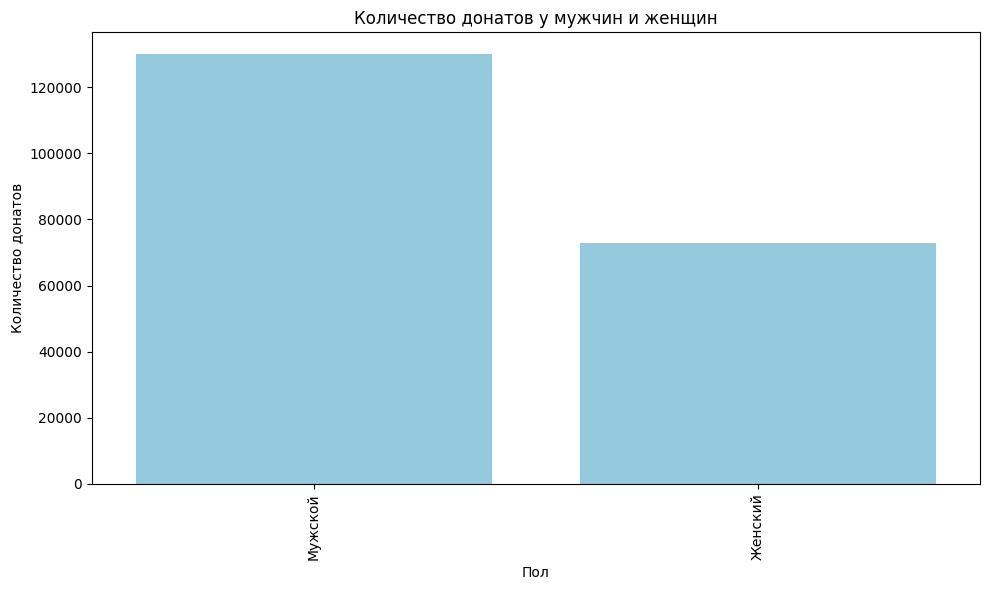

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sex, x='sex', y='id',  color="skyblue")

plt.title('Количество донатов у мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Количество донатов')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Среди донатов 64% принадлежат мужчинам, это 130 092 донатов. У женщин — 36%, всего 72 782. Количество данатов у мужчин превышает количество у женщин в 1,8 раза. Также среди донатеров меньше женщин - 9 564 или 46%, мужчин 11 074	 или 54%. Следует рассмотреть возможность привлечения новых донатеров — женщин, а также стимулирования повторных пожертвований.

**Какая категория людей чаще сдает кровь?**

Пишем функцию и создаем столбец с категориями.

In [51]:
def category(x):
    if x <= 25:
        return '18-25'
    elif x >= 26 and x <= 50:
        return '26-50'
    else:
        return '51-60'

In [52]:
df['category'] = df['age'].apply(category)

In [53]:
df.head(3)

,id,blood,dt_donat,dt_plan,type_donat,city,country,place,report,dt_confirm,status,sex,year_donat,month_donat,age,category
0,210974,Цельная кровь,2023-11-22,NaT,Безвозмездно,Оренбург,Россия,"ГБУЗ ""Оренбургская областная станция переливан...",Да,2024-08-25,На модерации,Мужской,2023,2023-11,37.0,26-50
1,146460,Плазма,2024-08-16,2024-08-16,Безвозмездно,Рыбинск,Россия,"ГБУЗ ЯО ""Рыбинская станция переливания крови""",Да,2024-08-25,На модерации,Женский,2024,2024-08,34.0,26-50
2,292587,Цельная кровь,2024-08-24,2024-08-24,Безвозмездно,Москва,Россия,Центр крови им. Гаврилова (центр в Царицыно),Да,2024-08-25,На модерации,Женский,2024,2024-08,36.0,26-50


Построим таблицу и график.

In [54]:
category = df.query('status == "Принята"').groupby('category')['id'].count().reset_index().sort_values(by='id', ascending=False)
category_2 =  df.query('status == "Принята"').groupby('category')['id'].nunique().reset_index().sort_values(by='id', ascending=False)
category['procent'] = round(category['id'] / category['id'].sum() * 100)
category_2['procent'] = round(category_2['id'] / category_2['id'].sum() * 100)


In [55]:
display(category)
category_2

,category,id,procent
1,26-50,178224,88.0
0,18-25,16598,8.0
2,51-60,8323,4.0


,category,id,procent
1,26-50,16541,80.0
0,18-25,3531,17.0
2,51-60,628,3.0


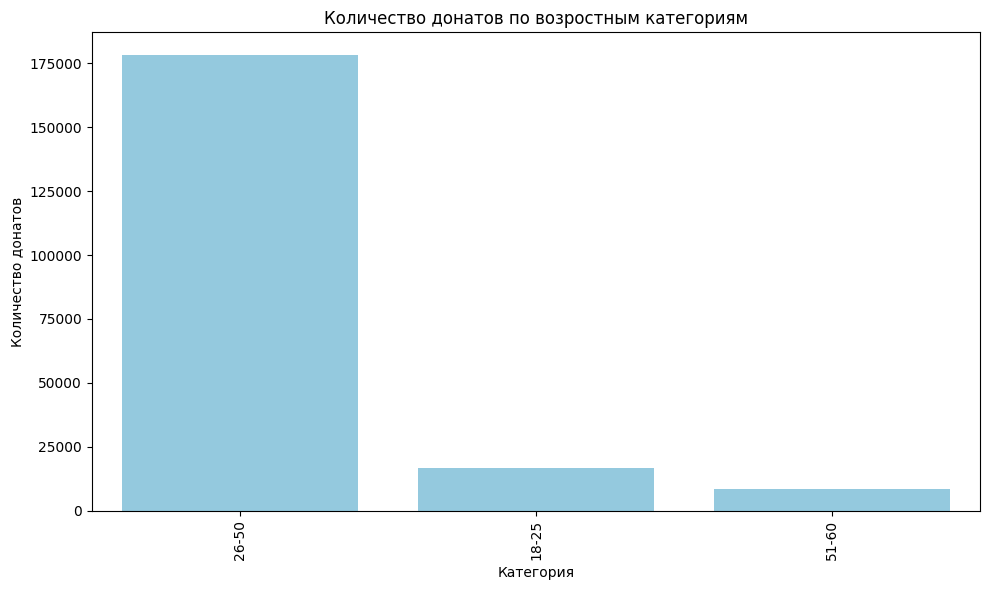

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category, x='category', y='id',  color="skyblue")

plt.title('Количество донатов по возростным категориям')
plt.xlabel('Категория')
plt.ylabel('Количество донатов')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Категория «26-50» лидирует: 178 224 донатов — 88% от общего числа донатов, потом идет категория «18-25» — 16 598 — 8%, и замыкает тройку категория «51-60» — 8 323 — 4%. Возможно, стоит обратить внимание на привлечение к сдаче крови молодых людей в возрасте от 18 до 25 лет, то есть потенциальных студентов.

**В каких городах больше всего сдают кровь? Топ-10 городов доноров.**

Сгруппируем данные по городам.

In [57]:
city = df.query('status == "Принята"').groupby('city')['id'].count().reset_index().sort_values(by='id', ascending=False)

Создадим таблицу с населением городов, чтобы посмотреть, сколько на одного жителя приходится донатов.

In [58]:
pop = {
    
    "city": 
    ["Москва", "Санкт-Петербург", "Новосибирск", "Екатеринбург", "Казань", "Нижний Новгород", "Челябинск", "Самара", "Омск", "Ростов-на-Дону",
     "Уфа", "Красноярск", "Воронеж", "Пермь", "Волгоград", "Краснодар", "Саратов", "Тюмень", "Тольятти", "Ижевск", "Барнаул", "Ульяновск", 
     "Иркутск", "Хабаровск", "Махачкала", "Ярославль", "Владивосток", "Оренбург", "Томск", "Кемерово", "Новокузнецк", "Рязань", "Астрахань", 
     "Пенза", "Набережные Челны", "Липецк", "Тула", "Киров", "Чебоксары", "Улан-Удэ", "Калининград", "Брянск", "Курск", "Иваново", 
     "Магнитогорск", "Тверь", "Ставрополь", "Севастополь(Оспаривается)", "Нижний Тагил", "Белгород", 
     "Архангельск", "Владимир", "Сочи", "Курган", "Симферополь(Оспаривается)", "Смоленск", "Калуга", "Чита", "Саранск", "Орёл", "Волжский", 
             "Череповец", "Владикавказ", "Мурманск", "Сургут", "Вологда", "Тамбов", "Стерлитамак", "Грозный", "Якутск", "Кострома", "Комсомольск-на-Амуре", 
              "Петрозаводск", "Таганрог", "Нижневартовск", "Йошкар-Ола", "Братск", "Новороссийск", "Дзержинск", "Шахты", "Нальчик", "Орск", "Сыктывкар", 
              "Нижнекамск", "Ангарск", "Королёв", "Старый Оскол", "Великий Новгород", "Балашиха", "Благовещенск", "Прокопьевск", "Химки", "Псков", 
              "Бийск", "Энгельс", "Рыбинск", "Балаково", "Северодвинск", "Армавир", "Подольск"],
   
    "population": [12655050, 5384342, 1620162, 1495066, 1257341, 1244251, 1187960, 1144759, 1139897, 1137704, 1125933, 1092851, 1050602, 
                  1049199, 1004763, 948827, 830155, 816800, 693072, 646468, 631127, 625462, 617315, 610305, 604266, 601403, 600871, 572819, 
                  568508, 552546, 547885, 525062, 520662, 519592, 513242, 508124, 501129, 473668, 447929, 431922, 431491, 415640, 414595, 
                  409277, 408401, 403726, 398266, 393304, 361883, 356426,348716, 348256, 343285, 333640, 332317, 326863, 325185, 323964, 318841, 317854, 314436, 312311, 311635, 307664, 306703, 301642, 
                  280457, 273432, 271596, 269486, 268617, 263906, 263540, 257692, 251860, 248688, 246348, 241788, 240762, 240152, 240095, 238006, 
                  235006, 234108, 233765, 225858, 221163, 218724, 215353, 214397, 210150, 207125, 203974, 203826, 202838, 200771, 199576, 192265, 
                  188897, 187956]
}




In [59]:
population = pd.DataFrame(pop)

In [60]:
city = city.merge(population, how='left', on='city')

In [61]:
city.loc[27, "population"] = 393304
city.loc[37, "population"] = 332317

Создаем столбец с отношением доната на человека. 

In [62]:
city['ratio'] = round(city['id'] / city['population'], 4)

In [63]:
top_city = city.head(10)

Отсортируем данные по столбцу с отношением.

In [64]:
city_ratio = city.sort_values(by='ratio', ascending=False).head(10)

In [65]:
display(top_city)
city_ratio

,city,id,population,ratio
0,Москва,40303,12655050.0,0.0032
1,Санкт-Петербург,12985,5384342.0,0.0024
2,Казань,12660,1257341.0,0.0101
3,Уфа,5667,1125933.0,0.0050
4,Нижневартовск,5169,251860.0,0.0205
5,Екатеринбург,4257,1495066.0,0.0028
6,Самара,4081,1144759.0,0.0036
7,Красноярск,3750,1092851.0,0.0034
8,Челябинск,3596,1187960.0,0.0030
9,Сургут,3242,306703.0,0.0106


,city,id,population,ratio
4,Нижневартовск,5169,251860.0,0.0205
9,Сургут,3242,306703.0,0.0106
2,Казань,12660,1257341.0,0.0101
26,Благовещенск,1375,214397.0,0.0064
10,Кемерово,3018,552546.0,0.0055
22,Смоленск,1665,326863.0,0.0051
3,Уфа,5667,1125933.0,0.0050
14,Ярославль,2526,601403.0,0.0042
21,Иваново,1685,409277.0,0.0041
28,Белгород,1313,356426.0,0.0037


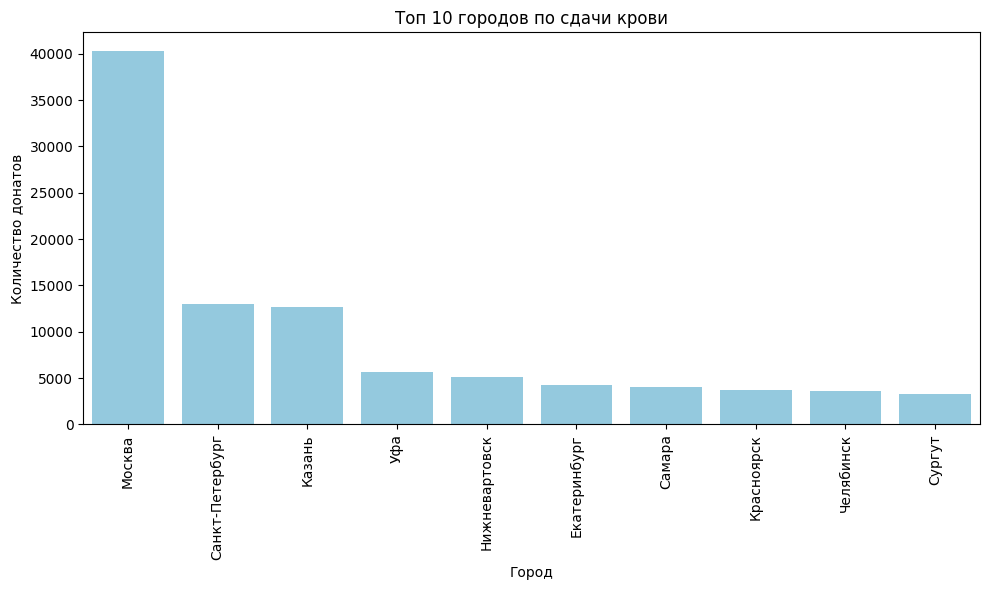

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_city, x='city', y='id',  color="skyblue")

plt.title('Топ 10 городов по сдачи крови')
plt.xlabel('Город')
plt.ylabel('Количество донатов')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

На основании двух таблиц  и одного графика мы можем сделать вывод, что топ-10 городов и топ-10 городов в отношении одного доната на человека различаются. Например, в тройку лидеров по количеству доноров в топ-10 городов вошли:
1. Москва — 40 303 донатов;
2. Санкт-Петербург — 12 985 донатов;
3. Казань — 12 660 донатов;

В то же время в топ-10 городов в  отношении одного доната на человека вошли:
1. Нижневартовск;
2. Сургут;
3. Казань;

Москва же занимает 19 место, а Санкт-Петербург — 37 место.

Это говорит о том, что Москве и Санкт-Петербургу есть куда развиваться в плане привлечения потенциальных доноров. Стоит обратить на это внимание.

**Топ-10 пунктов сдачи крови.**

In [67]:
top_place = df.query('status == "Принята"').groupby('place')['id'].count().reset_index().sort_values(by='id', ascending=False).head(10)

In [68]:
top_place

,place,id
608,"ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)",8615
178,Выездная акция,8523
201,"ГБУЗ ""Республиканская станция переливания крови""",5538
182,ГАУЗ «Республиканский центр крови Министерства...,5305
347,"КУ ХМАО - Югры ""Станция переливания крови"", фи...",5157
350,Казанский плазмоцентр ФГБУ РМНПЦ «Росплазма» Ф...,4826
204,"ГБУЗ ""Самарская областная станция переливания ...",3937
194,"ГБУЗ ""ГКБ № 52"", отделение переливания крови",3843
338,"КГБУЗ ""Красноярский краевой центр крови № 1""",3630
666,Центр крови им. Гаврилова (центр на Беговой),3620


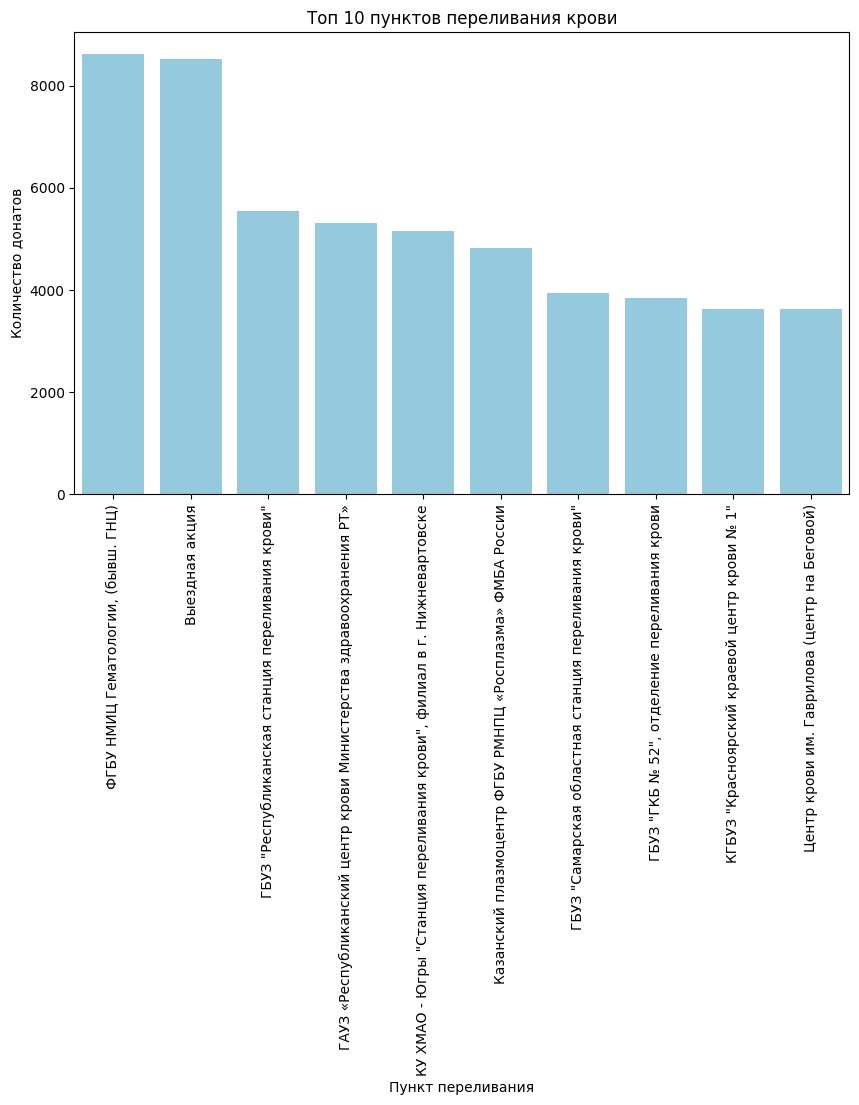

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_place, x='place', y='id',  color="skyblue")

plt.title('Топ 10 пунктов переливания крови')
plt.xlabel('Пункт переливания')
plt.ylabel('Количество донатов')
plt.xticks(rotation=90)
plt.show()


Первое место у ФГБУ НМИЦ гематологии (бывш. ГНЦ), второе у выездной акции, а третье у ГБУЗ "Республиканская станция переливания крови".

**Топ-5 страны.**

In [70]:
top_country = df.query('status == "Принята"').groupby('country')['id'].count().reset_index().sort_values(by='id', ascending=False).head(5)

In [71]:
top_country

,country,id
6,Россия,198576
9,Украина,667
1,Беларусь,598
3,Казахстан,466
5,Молдова,83


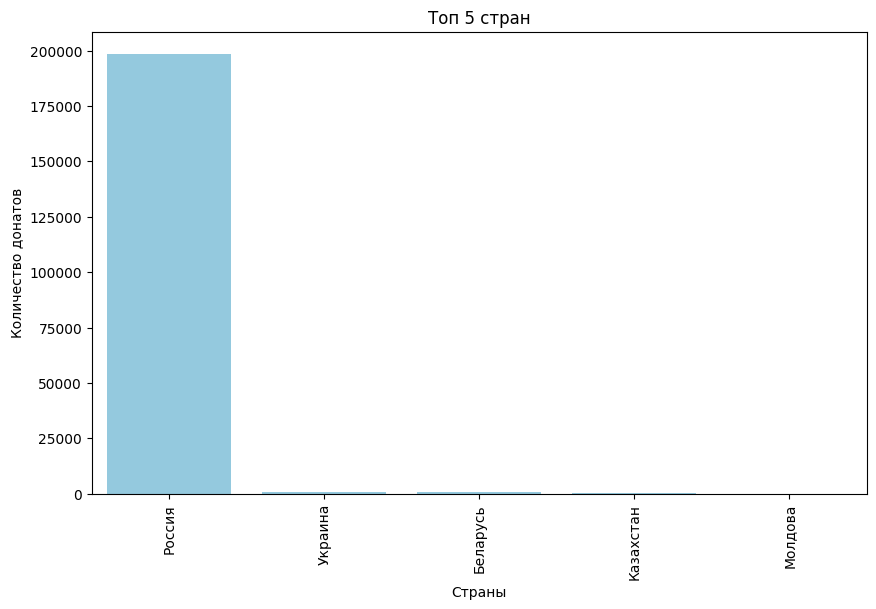

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_country, x='country', y='id',  color="skyblue")

plt.title('Топ 5 стран')
plt.xlabel('Страны')
plt.ylabel('Количество донатов')
plt.xticks(rotation=90)
plt.show()

Россия в разы опережает другие страны.

**Промежуточный вывод:**

Всего было подтержденно 203145 донатов. цельную кровь сдавали чаще всего — 129 894 раз, что составляет 64% от общего количества донатов. Плазму сдают реже — 48 603 раз, или 24%. Тромбоциты сдали 24 245 раза, или 12%.

Среди донатов 64% принадлежат мужчинам, это 130 092 донатов. У женщин — 36%, всего 72 782. Количество данатов у мужчин превышает количество у женщин в 1,8 раза. Также среди донатеров меньше женщин - 9 564 или 46%, мужчин 11 074 или 54%. Следует рассмотреть возможность привлечения новых донатеров — женщин, а также стимулирования повторных пожертвований.

Что касается категорий, то тут категория «26-50» лидирует: 178 224 донатов — 88% от общего числа донатов, потом идет категория «18-25» — 16 598 — 8%, и замыкает тройку категория «51-60» — 8 323 — 4%. Возможно, стоит обратить внимание на привлечение к сдаче крови молодых людей в возрасте от 18 до 25 лет, то есть потенциальных студентов.

На основании двух таблиц и одного графика мы  сделали вывод, что топ-10 городов и топ-10 городов в отношении одного доната на человека различаются. Например, в тройку лидеров по количеству доноров в топ-10 городов вошли:

Москва — 40 303 донатов;
Санкт-Петербург — 12 985 донатов;
Казань — 12 660 донатов;
В то же время в топ-10 городов в отношении одного доната на человека вошли:

Нижневартовск;
Сургут;
Казань;
Москва же занимает 19 место, а Санкт-Петербург — 37 место.

Это говорит о том, что Москве и Санкт-Петербургу есть куда развиваться в плане привлечения потенциальных доноров. Стоит обратить на это внимание.

Что касается пунктов сдачи крови - первое место у ФГБУ НМИЦ гематологии (бывш. ГНЦ), второе у выездной акции, а третье у ГБУЗ "Республиканская станция переливания крови".

В России больше всего сдавали кровь.


## Кластеризация

In [73]:
df.head(3)

,id,blood,dt_donat,dt_plan,type_donat,city,country,place,report,dt_confirm,status,sex,year_donat,month_donat,age,category
0,210974,Цельная кровь,2023-11-22,NaT,Безвозмездно,Оренбург,Россия,"ГБУЗ ""Оренбургская областная станция переливан...",Да,2024-08-25,На модерации,Мужской,2023,2023-11,37.0,26-50
1,146460,Плазма,2024-08-16,2024-08-16,Безвозмездно,Рыбинск,Россия,"ГБУЗ ЯО ""Рыбинская станция переливания крови""",Да,2024-08-25,На модерации,Женский,2024,2024-08,34.0,26-50
2,292587,Цельная кровь,2024-08-24,2024-08-24,Безвозмездно,Москва,Россия,Центр крови им. Гаврилова (центр в Царицыно),Да,2024-08-25,На модерации,Женский,2024,2024-08,36.0,26-50


Сделаем новую таблицу где будет месяц, id и количество донатов сделанных за месяц.

In [74]:
donat_month = df.groupby(['month_donat', 'id'])['id'].count().reset_index(name='count')

Давайте посмотрим на распределение донатов.



In [75]:
donat_month['count'].describe()

count    198840.000000
mean          1.118784
std           0.372076
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          22.000000
Name: count, dtype: float64

In [76]:
donat_month = donat_month.query('count <= 6')

In [77]:
donat_month = donat_month.query('month_donat <= "2024-12"')

Теперь, сделаем сводную таблицу где столбцы будут месяца, а строки id.



In [78]:
pivot_2 = pd.pivot_table(donat_month, values='count', index='id', columns='month_donat')

Заменим пропуски на 0

In [79]:
pivot_2 = pivot_2.fillna(0)

Пишем функцию, которая сформирует кластеры.

Принцип работы: 

- Активный донор — есть донат в последние 12 месяцев и общая сумма донатов за последние 24 месяца больше или равна одному, или в последние 12 месяцев сделано два доната или больше.
- Первичный донор — есть один донат в последние 12 месяцев, но раньше донатов не было. Это донор, который впервые сделал донат и лишь один, поэтому мы не добавляем его в активную группу.
- Потерянный донор — последние 24 месяца нет донатов.
- Спящий донор - 12 месяцев назад по 24  месяц назад был донат, после нет донатов.
- Реактивированный — в последние 12 месяцев есть донаты, но до этого 24 месяца не было донатов, и в каком то месяце 24 месяца назад и раньше был донат.


In [80]:
def cluster_2(x):
    if x.iloc[-12:-1].sum() >= 1 and x[-36:-13].sum() >= 1 or x.iloc[-12:-1].sum() >= 2:
        return 'активный донор'
    elif x.iloc[-24:-1].sum() == 0:
        return 'потерянный донор'
    elif x.iloc[-11:-1].sum() == 0 and x.iloc[-24:-12].sum() >= 1:
        return 'спящий донор'
    elif x.iloc[-36:-13].sum() == 0 and x.iloc[-12:-1].sum() >= 1 and x[:-25].sum() >= 1:
        return 'реактивированный донор'
    elif x.iloc[-12:-1].sum() == 1 and x[:-13].sum() == 0:
        return 'Первичный донор'


In [81]:
pivot_2['clusters'] = pivot_2.apply(cluster_2, axis=1)

In [82]:
pivot_2

month_donat,1983-09,1984-07,1985-01,1986-09,1987-03,1987-05,1987-10,1987-12,1988-03,1988-05,...,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,clusters
id,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,потерянный донор
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,потерянный донор
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,потерянный донор
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,потерянный донор
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,потерянный донор
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0,1.0,активный донор
300252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,активный донор
300254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,потерянный донор


In [83]:
piv_2 = pivot_2.reset_index()

Объединим таблицы.

In [84]:
df_final_2 = pd.merge(piv_2[['id', 'clusters']], df, on='id', how='left')

In [85]:
df_final_2.head()

,id,clusters,blood,dt_donat,dt_plan,type_donat,city,country,place,report,dt_confirm,status,sex,year_donat,month_donat,age,category
0,4,потерянный донор,Плазма,2020-07-08,NaT,Безвозмездно,Санкт-Петербург,Россия,"Военно-медицинская академия им. С.М. Кирова, о...",Да,2020-11-18,Без справки,Мужской,2020,2020-07,26.0,26-50
1,7,потерянный донор,Цельная кровь,2020-08-18,NaT,Платно,Самара,Россия,"ГБУЗ ""Самарская областная станция переливания ...",Да,2020-11-18,Принята,Мужской,2020,2020-08,26.0,26-50
2,8,потерянный донор,Цельная кровь,2020-08-18,NaT,Безвозмездно,Томск,Россия,"ОГБУЗ ""Томский региональный центр крови""",Да,2020-11-18,Принята,Женский,2020,2020-08,52.0,51-60
3,8,потерянный донор,Цельная кровь,2020-06-16,NaT,Безвозмездно,Томск,Россия,"ОГБУЗ ""Томский региональный центр крови""",Да,2020-11-18,Принята,Женский,2020,2020-06,52.0,51-60
4,8,потерянный донор,Цельная кровь,2020-04-14,NaT,Безвозмездно,Томск,Россия,"ОГБУЗ ""Томский региональный центр крови""",Да,2020-11-18,Принята,Женский,2020,2020-04,52.0,51-60


Посмотрим на распределение кластеров.

In [86]:
cls_2 = df_final_2.groupby('clusters')['id'].nunique().reset_index().sort_values(by='id', ascending=False)

In [87]:
cls_2['procent'] = round(cls_2['id'] / cls_2['id'].sum() * 100)

In [88]:
cls_2

,clusters,id,procent
2,потерянный донор,10785,43.0
1,активный донор,7386,30.0
4,спящий донор,5155,21.0
0,Первичный донор,1268,5.0
3,реактивированный донор,246,1.0


In [89]:
cls_2['id'].sum()

24840

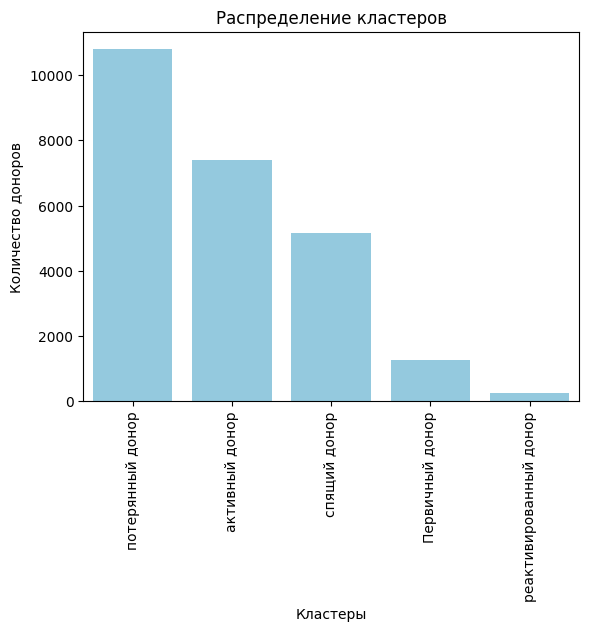

In [90]:
sns.barplot(data=cls_2, x='clusters', y='id', color='skyblue')
plt.xticks(rotation=90)
plt.title("Распределение кластеров")
plt.xlabel("Кластеры")
plt.ylabel("Количество доноров")
plt.show()

Преобладают потерянные доноры, их 10 785 - 43%, активных доноров 7 386 - 30%. Спящих доноров - 5 155 - 21%.  Первичный донор - 1 268 - 5%. Реактивированных доноров всего 246 - 1%.

## Итоговый вывод:


**Предобработка данных:**
- Было принято решение создать основную таблицу df из таблиц donations_anon и users_anon. В ней привели  столбцы в нормальный вид, убрали дубликаты и добавили  значения NaN в столбце dt_plan, где клиенты их не заполнили. Это же сделали со столбцами sex и birth. В столбцах dt_plan, dt_donat, dt_confirm, birth изменили тип данных на datetime и создали 4 новых столбца: год доната — year_donat, месяц доната — month_donat, возраст донора — age и столбец с возрастными категориями — category. В основную таблицу вошли люди от 18 до 60 лет, когда можно сдавать кровь.

**Исследовательский анализ:**
- Всего было подтверждено 203 145 донаций. Чаще всего сдавали цельную кровь — 129 894 раза, или 64% от общего числа донаций. Плазму сдают реже — 48 603 раза, или 24%, а тромбоциты — 24 245 раз, или 12%.

Среди донаций 64% принадлежит мужчинам (130 092), а у женщин — 36% (72 782). Количество донаций у мужчин превышает количество у женщин в 1,8 раза. Среди донаторов меньше женщин — 9 564 (46%), мужчин — 11 074 (54%). Следует рассмотреть возможность привлечения новых донаторов — женщин, а также стимулирования повторных пожертвований.

Категории «26–50» лидирует 178 224 донации — 88% от общего числа донаций, затем идет категория «18–25» — 16 598, или 8%, и замыкает тройку категория «51–60» — 8 323, или 4%. Возможно, стоит обратить внимание на привлечение молодых людей в возрасте от 18 до 25 лет к сдаче крови, то есть студентов.

На основании двух таблиц и одного графика мы  сделали вывод, что топ-10 городов и топ-10 городов в отношении одного доната на человека различаются. Например, в тройку лидеров по количеству доноров в топ-10 городов вошли:

Москва — 40 303 донатов;
Санкт-Петербург — 12 985 донатов;
Казань — 12 660 донатов;
В то же время в топ-10 городов в отношении одного доната на человека вошли:

Нижневартовск;
Сургут;
Казань;
Москва же занимает 19 место, а Санкт-Петербург — 37 место.

Это говорит о том, что Москве и Санкт-Петербургу есть куда развиваться в плане привлечения потенциальных доноров. Стоит обратить на это внимание.

В России же было сделано  больше всего донатов.

**Кластеризация:**
- Было сформировано 5 кластеров а именно:

Активный донор — есть донат в последние 12 месяцев и общая сумма донатов за последние 24 месяца больше или равно одному, или в последние 12 месяцев. сделано два доната или больше.

Первичный донор — есть один донат в последние 12 месяцев, но раньше донатов не было. Это донор, который впервые сделал донат и лишь один, поэтому мы не добавляем его в активную группу.

Потерянный донор — последние 24 месяца нет донатов.

Спящий донор - 12 месяцев назад по 24  месяц назад был донат, после нет донатов.

Реактивированный — в последние 12 месяцев есть донаты, но до этого 24 месяца не было донатов, и в каком то месяце 24 месяца назад и раньше был донат.

Из общего числа доноров, а это 24 840 человек, большинство составляют потерянные доноры, их 10 785 - 43%, активных доноров 7 386 - 30%. Спящих доноров - 5 155 - 21%.  Первичный донор - 1 268 - 5%. Реактивированных доноров всего 246 - 1%.

**Основные советы:**
- Попробовать привлечь больше студентов, продумать акции, которые были бы интересны именно этой категории.
- Попробовать привлечь больше женщин из возрастной группы 26-50, особенно важно сформировать повторные донаты.
- При привлечении новых донатеров стоит обратить внимание на Москву и Санкт-Петербург.